<a href="https://colab.research.google.com/github/2303A52189/AIML_2303A52189/blob/main/AIML_LABXAM_DECISIIONTREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
df=pd.read_csv('/content/archive (14).zip')

In [36]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [37]:
df.shape

(2500, 6)

In [38]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind_Speed,0
Cloud_Cover,0
Pressure,0
Rain,0


In [39]:
X = df.drop(columns=["Rain"])
y = df["Rain"]


In [40]:
# Encode the target variable
y_encoded = y.map({"rain": 1, "no rain": 0})


In [41]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

In [42]:
# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

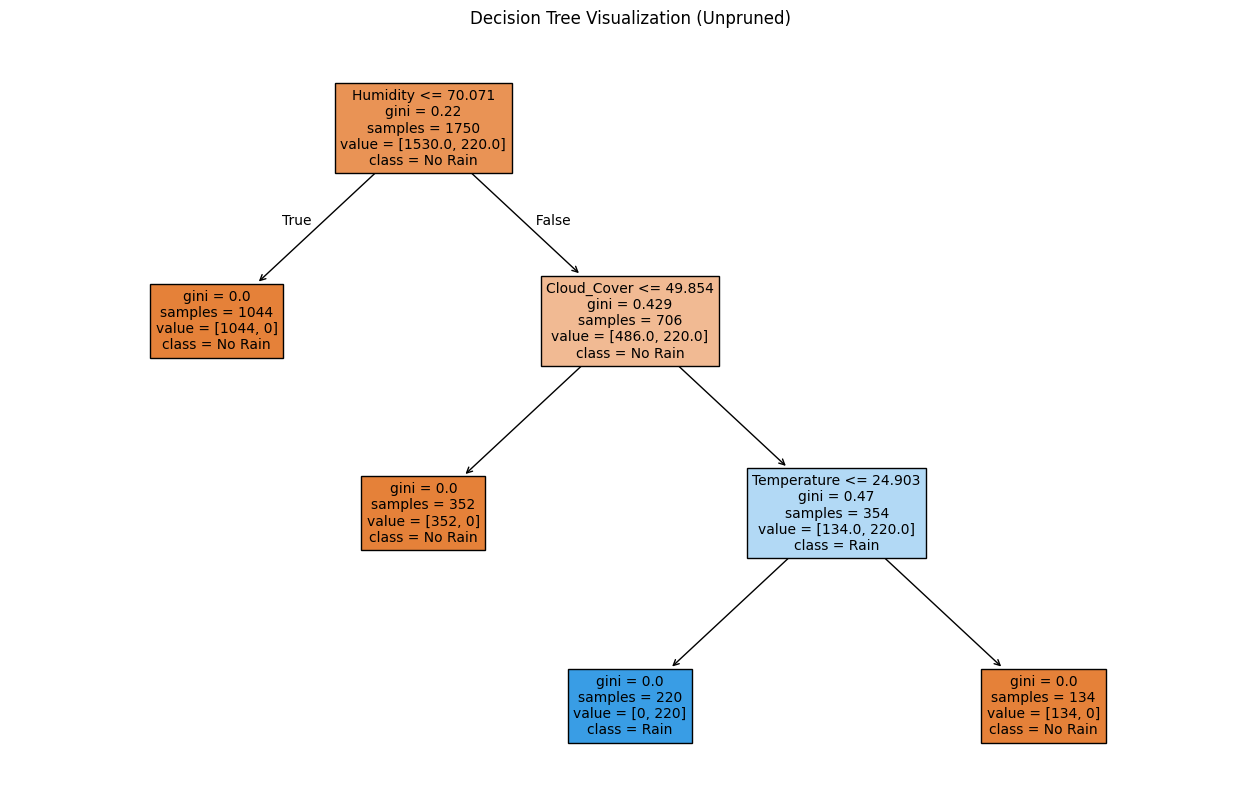

In [43]:
# Visualize the original Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=["No Rain", "Rain"], filled=True, fontsize=10)
plt.title("Decision Tree Visualization (Unpruned)")
plt.show()


In [44]:
# Evaluate the original model
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [45]:
print("Original Decision Tree:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Original Decision Tree:
Accuracy: 0.9986666666666667
Confusion Matrix:
 [[655   1]
 [  0  94]]


In [46]:
# Train a pruned Decision Tree Classifier with max_depth
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

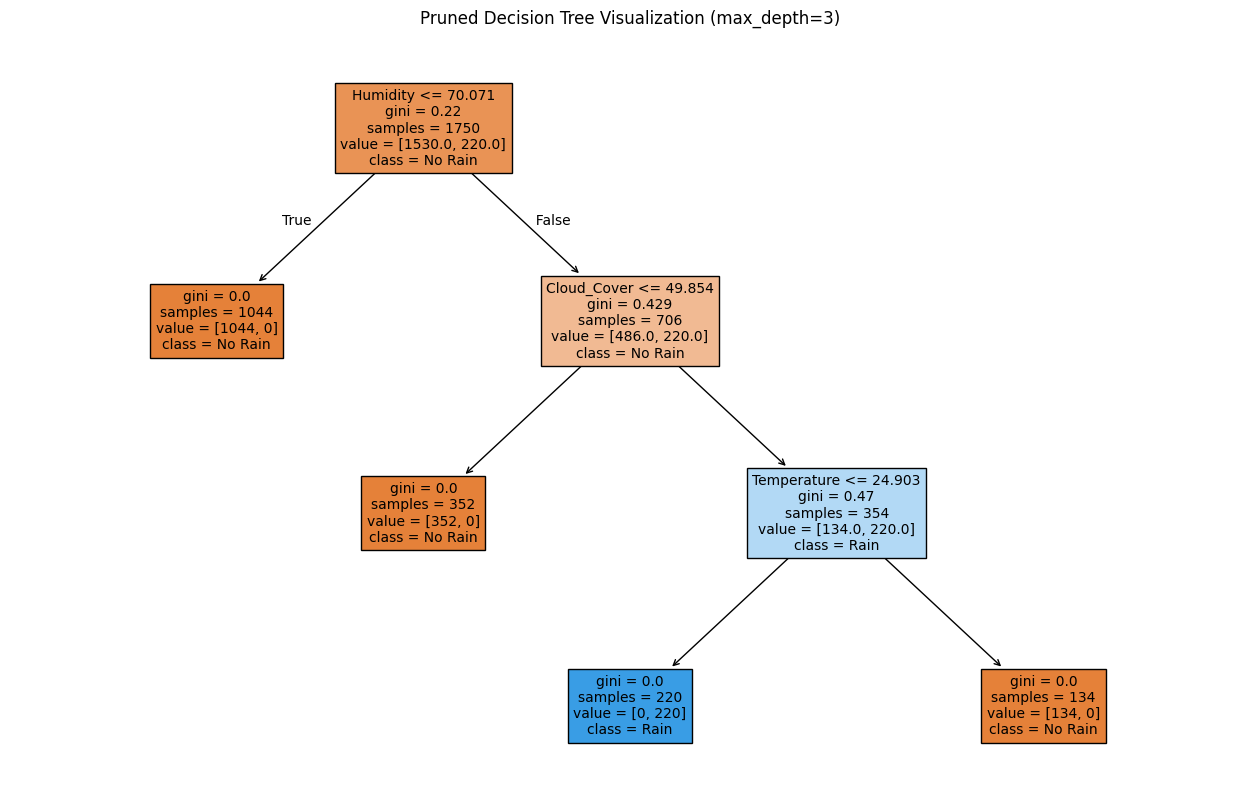

In [47]:
# Visualize the pruned tree
plt.figure(figsize=(16, 10))
plot_tree(dt_pruned, feature_names=X.columns, class_names=["No Rain", "Rain"], filled=True, fontsize=10)
plt.title("Pruned Decision Tree Visualization (max_depth=3)")
plt.show()

In [48]:
# Evaluate the pruned model
y_pred_pruned = dt_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
conf_matrix_pruned = confusion_matrix(y_test, y_pred_pruned)

print("Pruned Decision Tree (max_depth=3):")
print("Accuracy:", accuracy_pruned)
print("Confusion Matrix:\n", conf_matrix_pruned)


Pruned Decision Tree (max_depth=3):
Accuracy: 0.9986666666666667
Confusion Matrix:
 [[655   1]
 [  0  94]]


In [49]:
# Compare feature importances
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance (Unpruned)": dt_classifier.feature_importances_,
    "Importance (Pruned)": dt_pruned.feature_importances_
}).sort_values(by="Importance (Unpruned)", ascending=False)

print("\nFeature Importances:")
print(feature_importances)



Feature Importances:
       Feature  Importance (Unpruned)  Importance (Pruned)
0  Temperature               0.432960             0.432960
3  Cloud_Cover               0.354408             0.354408
1     Humidity               0.212631             0.212631
2   Wind_Speed               0.000000             0.000000
4     Pressure               0.000000             0.000000


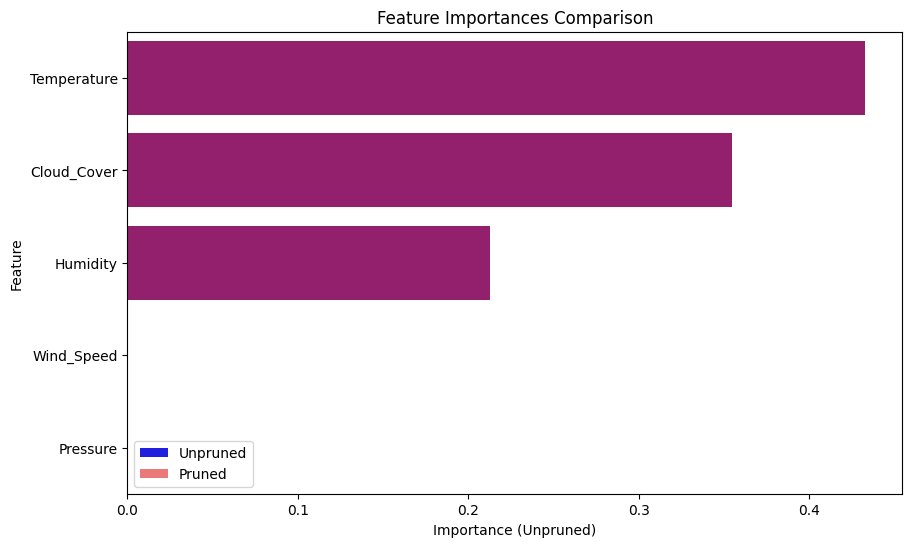

In [50]:
# Optional: Plot feature importance for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance (Unpruned)", y="Feature", data=feature_importances, color="b", label="Unpruned")
sns.barplot(x="Importance (Pruned)", y="Feature", data=feature_importances, color="r", alpha=0.6, label="Pruned")
plt.title("Feature Importances Comparison")
plt.legend()
plt.show()
